# Time Series Anomaly Detection Tutorial

## Introduction

Welcome to this Jupyter Notebook tutorial on time series anomaly detection. In this tutorial, we will walk through the process of detecting anomalies in time series data using the toolkit we created.

## Time Series data on Gas Chromatography

Gas chromatography (GC) is an analytical technique used to separate and analyze compounds within a sample. It finds applications across various scientific fields such as chemistry, pharmaceuticals, environmental science, and forensics.

### Principle of Gas Chromatography

Gas chromatography functions by separating a mixture into its individual components based on their distribution between a stationary phase and a mobile phase within a chromatographic column. When the sample is vaporized and injected into the GC system, the components interact differently with the stationary phase, resulting in varied travel rates through the column, hence achieving separation.

### Components of Gas Chromatography

1. **Injector:** This component introduces the sample into the gas chromatograph. It vaporizes the sample and injects it into the carrier gas stream, which carries the sample through the column.

2. **Column:** The column is the core of the gas chromatograph. It consists of a long, coiled tube packed with a stationary phase or coated with it on the inner wall. The interactions between sample components and the stationary phase cause separation.

3. **Carrier Gas:** Typically an inert gas like helium, nitrogen, or hydrogen, the carrier gas transports the sample through the column.

4. **Detector:** The detector identifies and quantifies the separated components as they elute from the column. Common detectors include flame ionization detector (FID), thermal conductivity detector (TCD), electron capture detector (ECD), and mass spectrometer (MS).

Gas chromatography is a powerful tool for analyzing complex mixtures, identifying compounds, and quantifying their presence within a sample, making it an invaluable technique in analytical chemistry and various scientific disciplines.

## Table of Contents

- **[Import Required Libraries and Tool Kit](#1--import-required-libraries-and-tool-kit)**    
- **[Data Loading and Preprocessing](#2--data-loading-and-preprocessing)**

    - **[Instantiate Data Manager and Load data](#21--instantiate-data-manager-and-load-data)**
    - **[Preprocess Data](#22--preprocess-data)**
    - **[Interpolate Nulls](#23--interpolate-nulls)**


- **[Anomaly Detection](#3--anomaly-detection)**

    - **[Instantiate Anomaly Detector](#31--instantiate-anomaly-detector)**
    - **[Selection of Algorithm](#32--selection-of-algorithm)**
    - **[Fitting Anomaly Detector](#33--fitting-anomaly-detector)**
    - **[Predicting Anomalies](#34--predicting-anomalies)**
    - **[Plotting Anomlaies](#35--plotting-anomalies)**

## Code Structure

Throughout this notebook, we'll be using Python and the following libraries:

- [pathlib](https://docs.python.org/3/library/pathlib.html) for working with file paths.
- [tstoolkit](TS Toolkit Documentation) for time series analysis and modeling.

## Let's Get Started!

We'll begin by importing the necessary libraries and tools and proceed step by step through the time series forecasting process.



## 1- Import Required Libraries and Tool Kit

In [1]:
# Import the Path class for working with file system paths
from pathlib import Path

# Import the DataManager class for data preprocessing
from tstoolkit.data_preprocess import DataManager

# Import the TimeSeriesAnomalyDetector class for anomaly detection
from tstoolkit.anomaly_detection import TimeSeriesAnomalyDetector

## 2- Data Loading and Preprocessing

In this section, we load and preprocess the time series data.

### 2.1- Instantiate Data Manager and Load Data
- Data Path: The data_path variable contains the file path or URL to the time series data in HDF5 format.
- DataManager: The data_manager object is an instance of a data management class (you should provide more details about this class if necessary) used to handle data loading and preprocessing.
- Load Data: We load the time series data from the specified path.

In [2]:
# Define the path to the time series data file
data_path = Path("../data/example_data.hd5")

# Create an instance of a data manager (DataManager) with the specified data file path
data_manager = DataManager(data_path)

# Load the time series data from the specified data file
data = data_manager.load_data()

### 2.2- Preprocess Data
- The data is preprocessed to reshape the data into a format suitable for the model

In [3]:
# Preprocess the time series data
data = data_manager.preprocess_data(data)

### 2.3- Interpolate Nulls
We fill any nulls in our time series, to prevent errors during training.
- Any missing or NaN values in the data are filled using interpolation techniques and possible methods described in the documentation.

In [5]:
# Fill gaps or missing values in the time series data using linear interpolation
data = data_manager.interpolate_nulls(data, interpolation_method="linear")

# Set DateTime column as index for anomaly detection models
data.set_index("DateTime",inplace=True)

# View top 5 rows of data
data.head()

,300468,300498,305256,315036,340686,341124,341550
DateTime,,,,,,,
2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
2020-01-01 00:00:30,59.085239,2036.812866,67.127098,114.341003,1.691197,5.378604,1.403499
2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
2020-01-01 00:01:30,74.437500,2036.780334,71.723625,114.207180,1.830390,5.459568,1.512679
2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


## 3- Anomaly Detection

In this section we will start detecting anomalies in the time series data

### 3.1- Instantiate Anomaly Detector

To begin, we create a Time Series Anomaly Detector instance (`time_series_detector`)

In [5]:
# Create a Time Series Anomaly Detector instance 
time_series_detector = TimeSeriesAnomalyDetector()

### 3.2- Selection of Algorithm

Then we select the anomaly detection algorithm to use. In this case, we've chosen the Isolation Forest, but you can replace it with other options if needed.

##### Isolation Forest

Isolation Forest is an unsupervised machine learning algorithm used for outlier detection. It works by isolating outliers in the dataset by constructing binary trees. It creates partitions by randomly selecting features and random split points between maximum and minimum values of selected features. Outliers require fewer partitions to be isolated, and therefore, they will have shorter average path lengths in these trees.

Key points:
- Well-suited for high-dimensional data.
- Efficient in identifying anomalies as it isolates them quicker than normal data points.

##### Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) is an unsupervised algorithm used for detecting outliers/anomalies in a dataset. LOF compares the local density of points to their neighbors. It measures the degree of abnormality of a data point with respect to its local neighborhood by considering the ratio of the local density of a point to the local densities of its neighbors.

Key points:
- Computes the local density deviation of a given data point with respect to its neighbors.
- It assigns an anomaly score to each sample, determining the abnormality of that sample compared to its neighbors.

##### One-Class Support Vector Machine (One-Class SVM)

One-Class Support Vector Machine (One-Class SVM) is a type of support vector machine designed for outlier detection and novelty detection in a dataset. It is trained on normal data instances and attempts to identify deviations from the normal pattern. It works by finding a hyperplane that separates the data from the origin while maximizing the margin and minimizing the number of data points that fall outside the margin.

Key points:
- Requires only normal data for training, as it aims to learn the boundary of normal instances.
- Useful for cases where only normal data is available for training.

In [6]:
# Choose an anomaly detection algorithm (check the documentation for other options, such as local_outlier_factor or one_class_svm)
algorithm_choice = "isolation_forest"

### 3.3- Fitting Anomaly Detector

Finally, The anomaly detector is trained using the data.

In [7]:
# Fit the anomaly detector with the data
time_series_detector.fit(data)

### 3.4- Predicting Anomalies

The trained anomaly detector (`time_series_detector`) can now predict anomalies in the time series data.

In [8]:
# Perform anomaly detection and obtain the anomaly predictions for the selected algorithm
anomalies = time_series_detector.predict(algorithm=algorithm_choice)

### 3.5- Plotting Anomalies

We visualize the detected anomalies using a plot generated by the `plot_anomalies()` method.

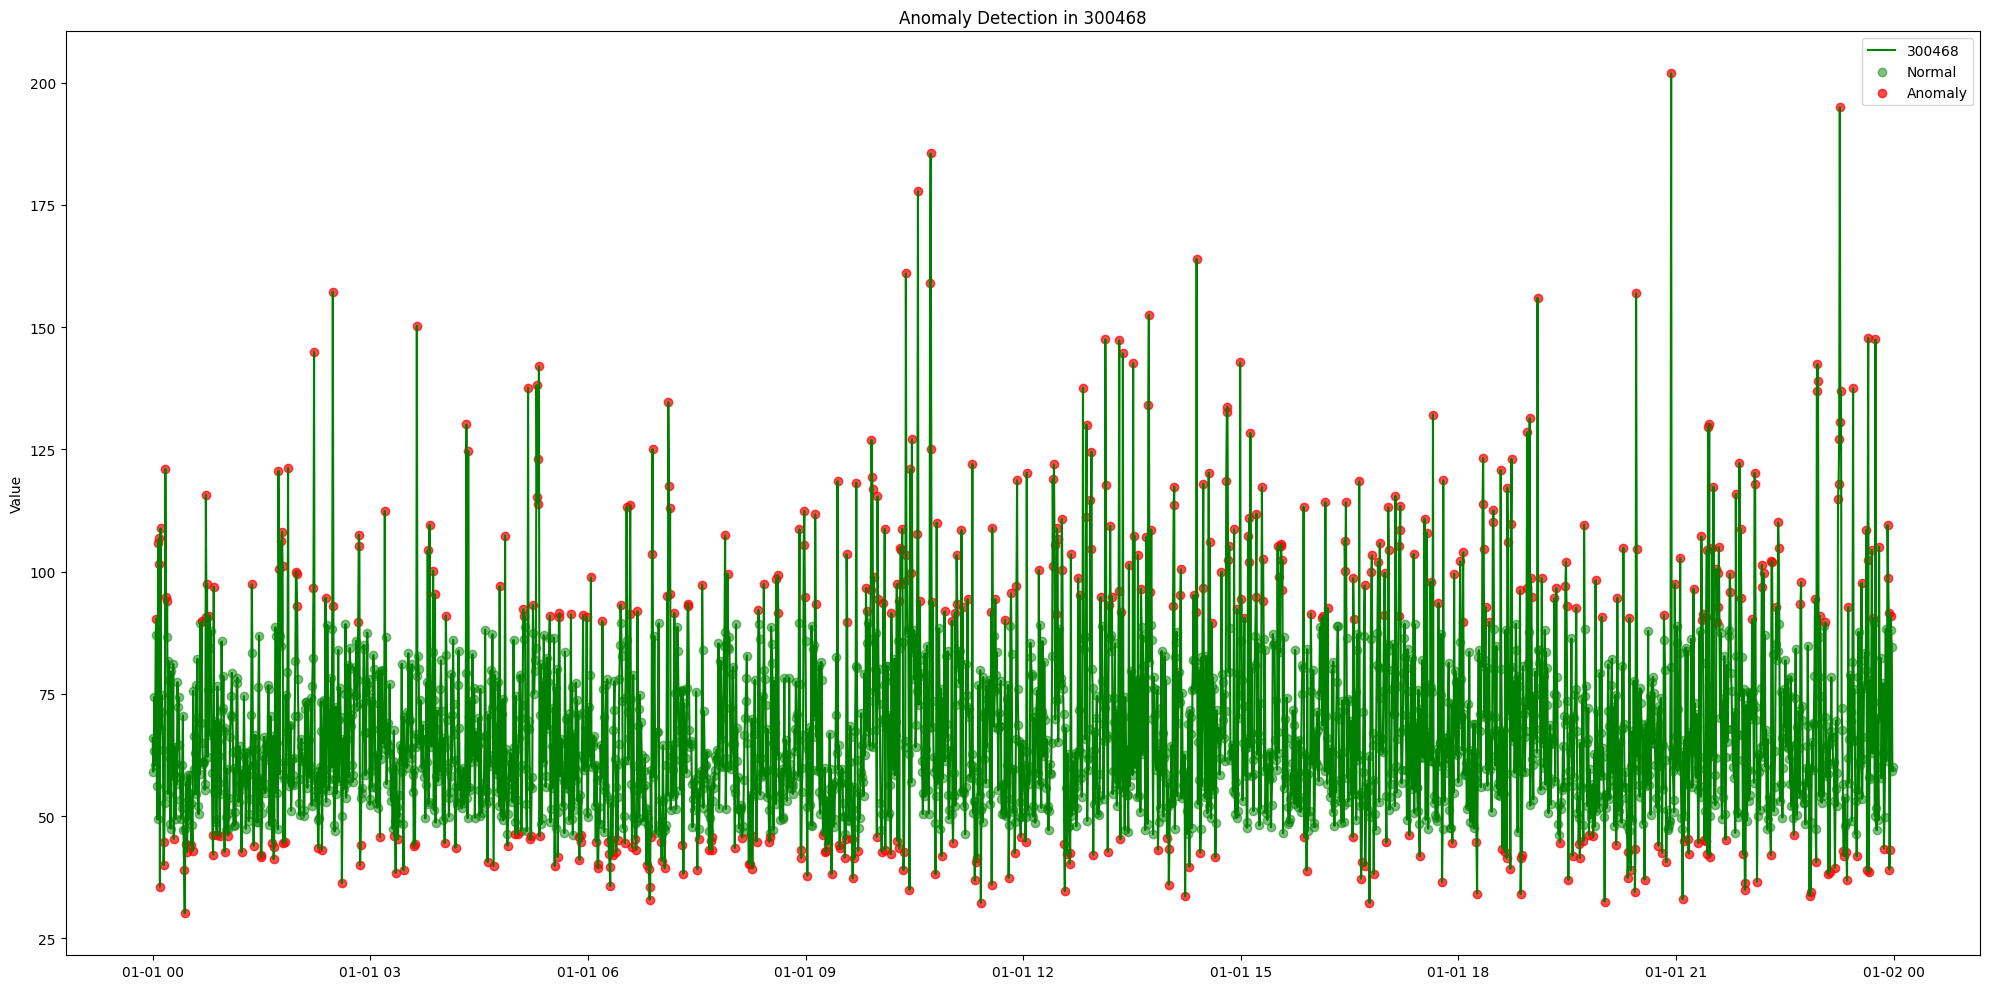

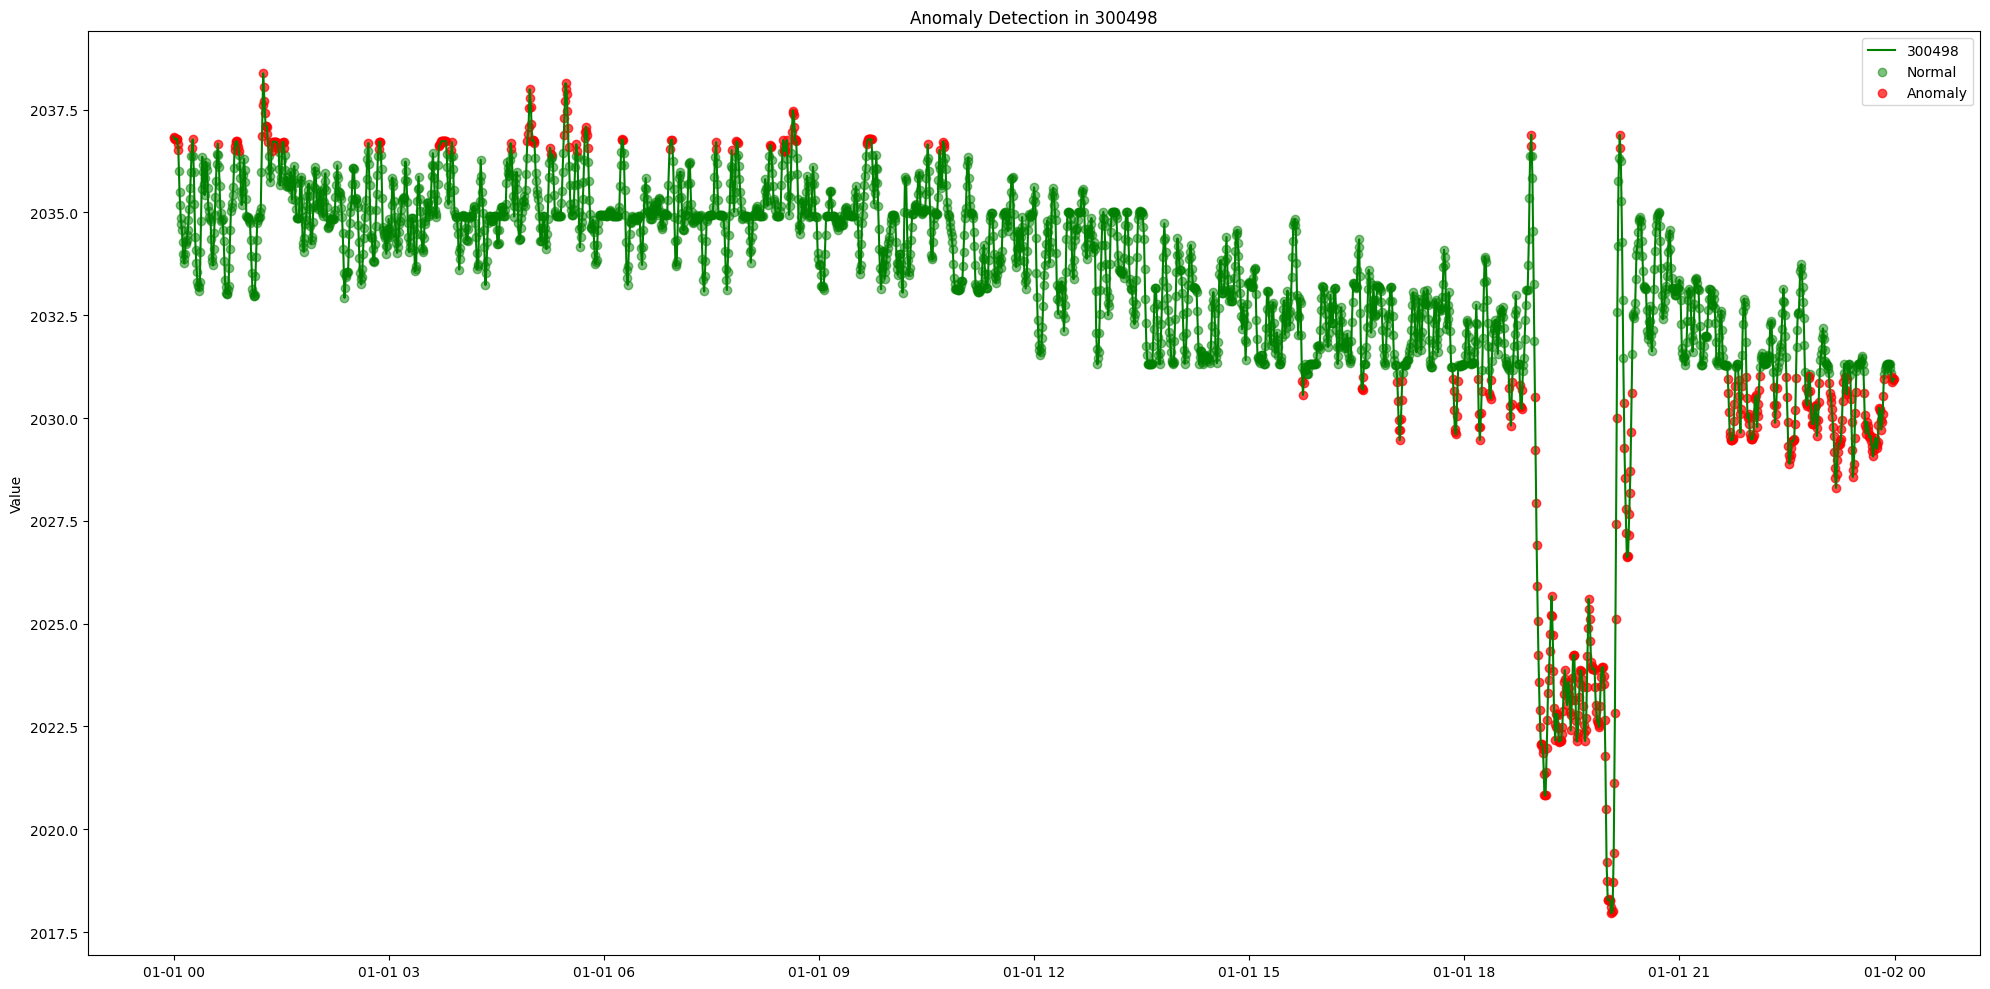

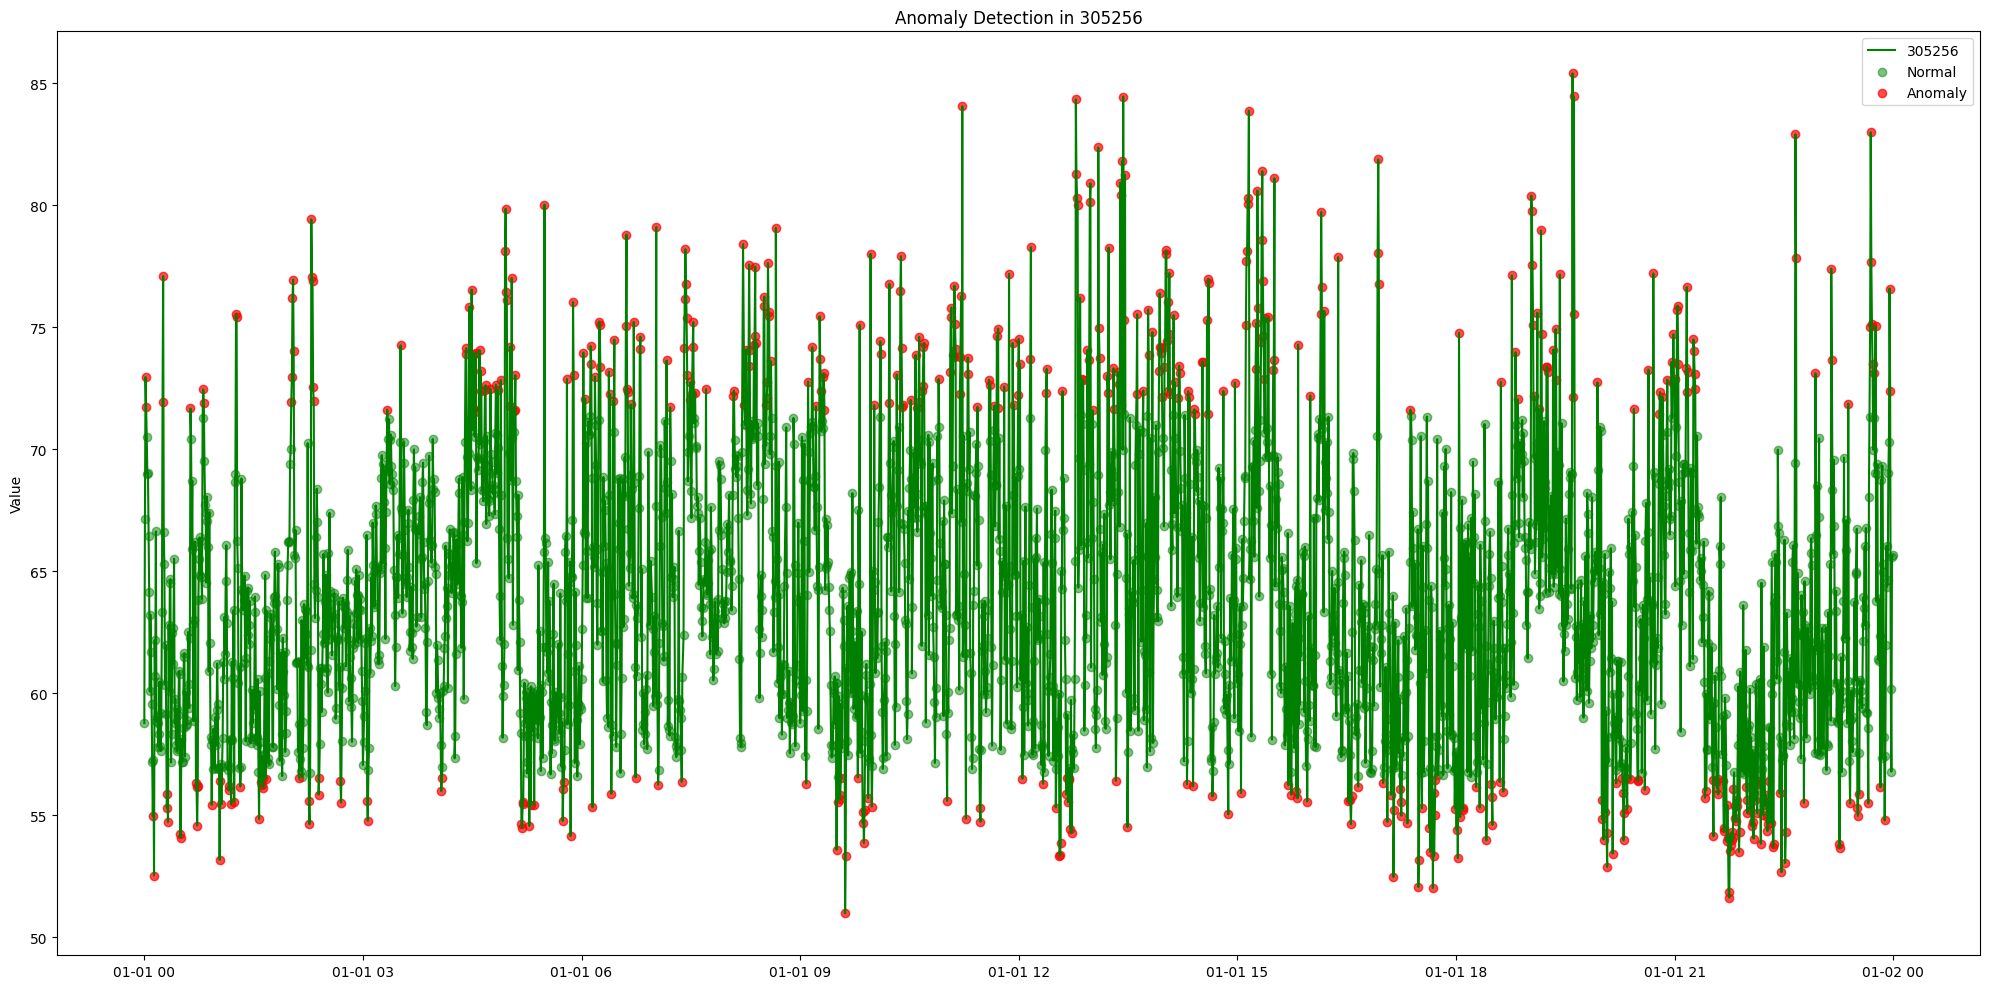

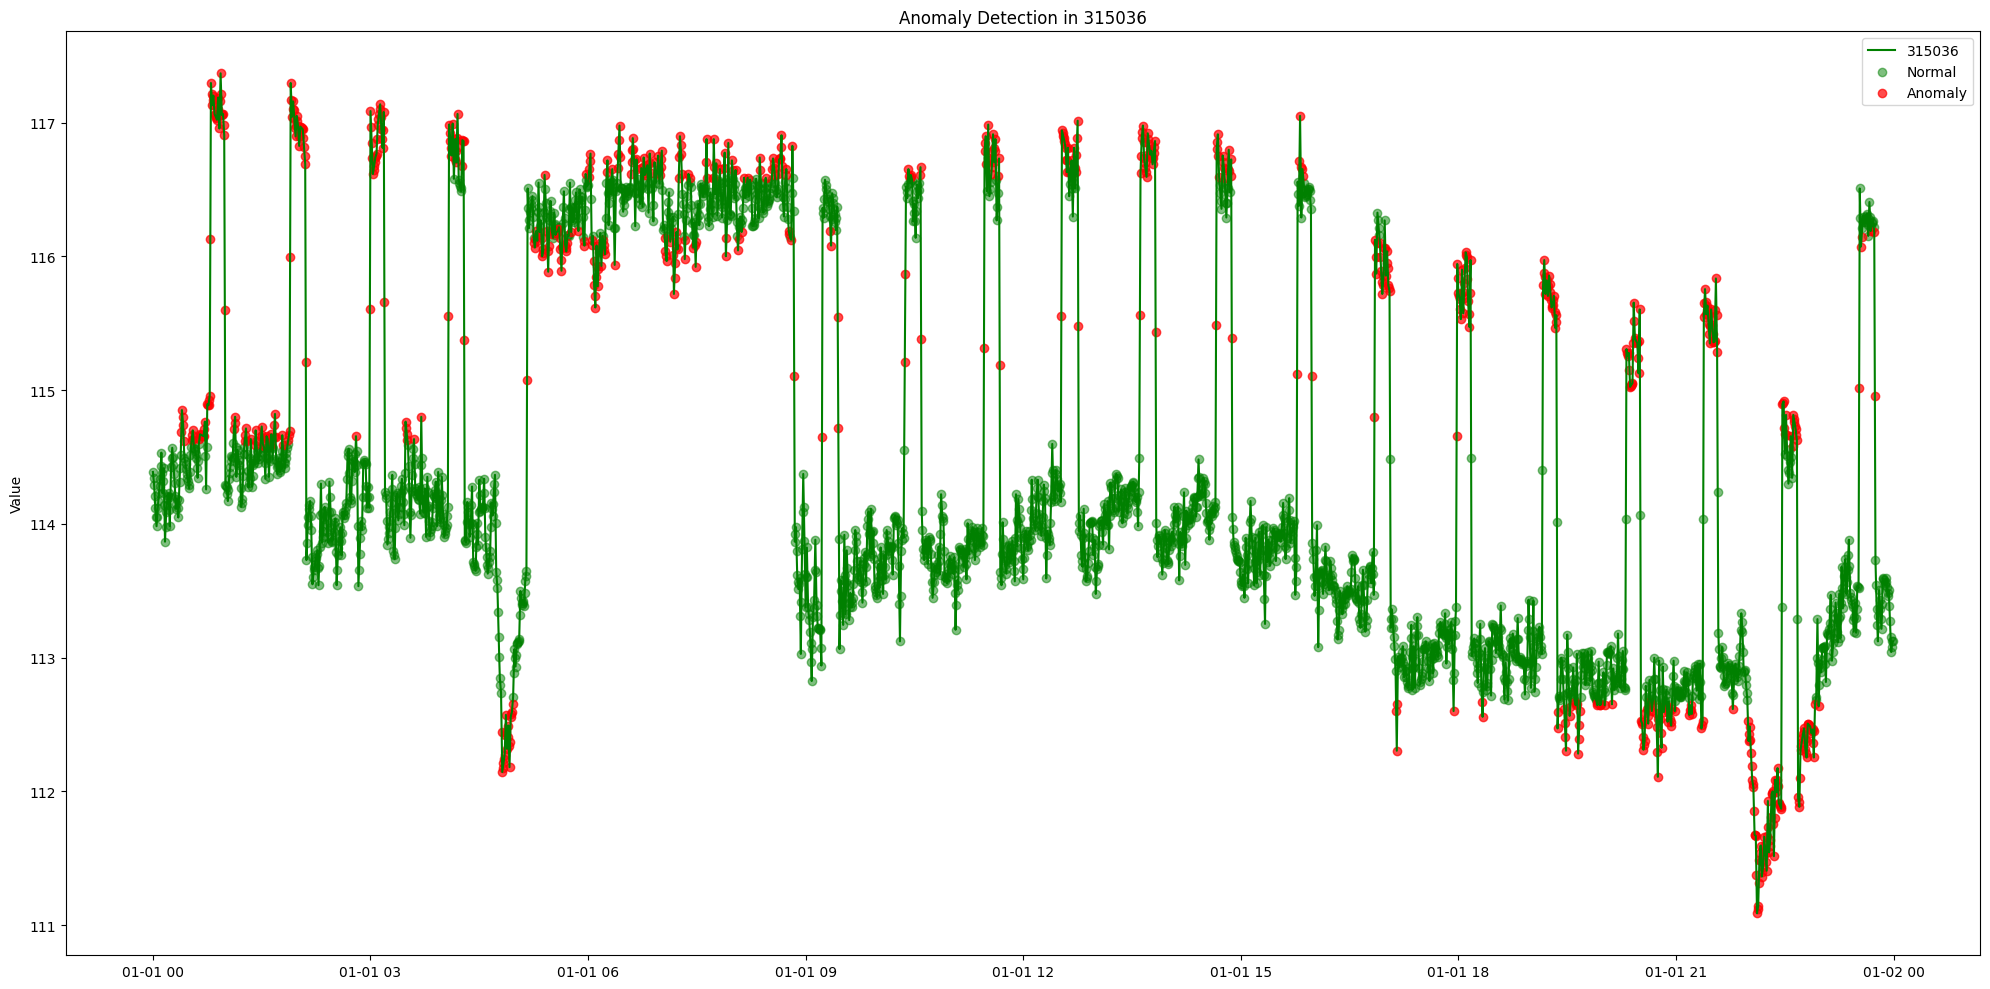

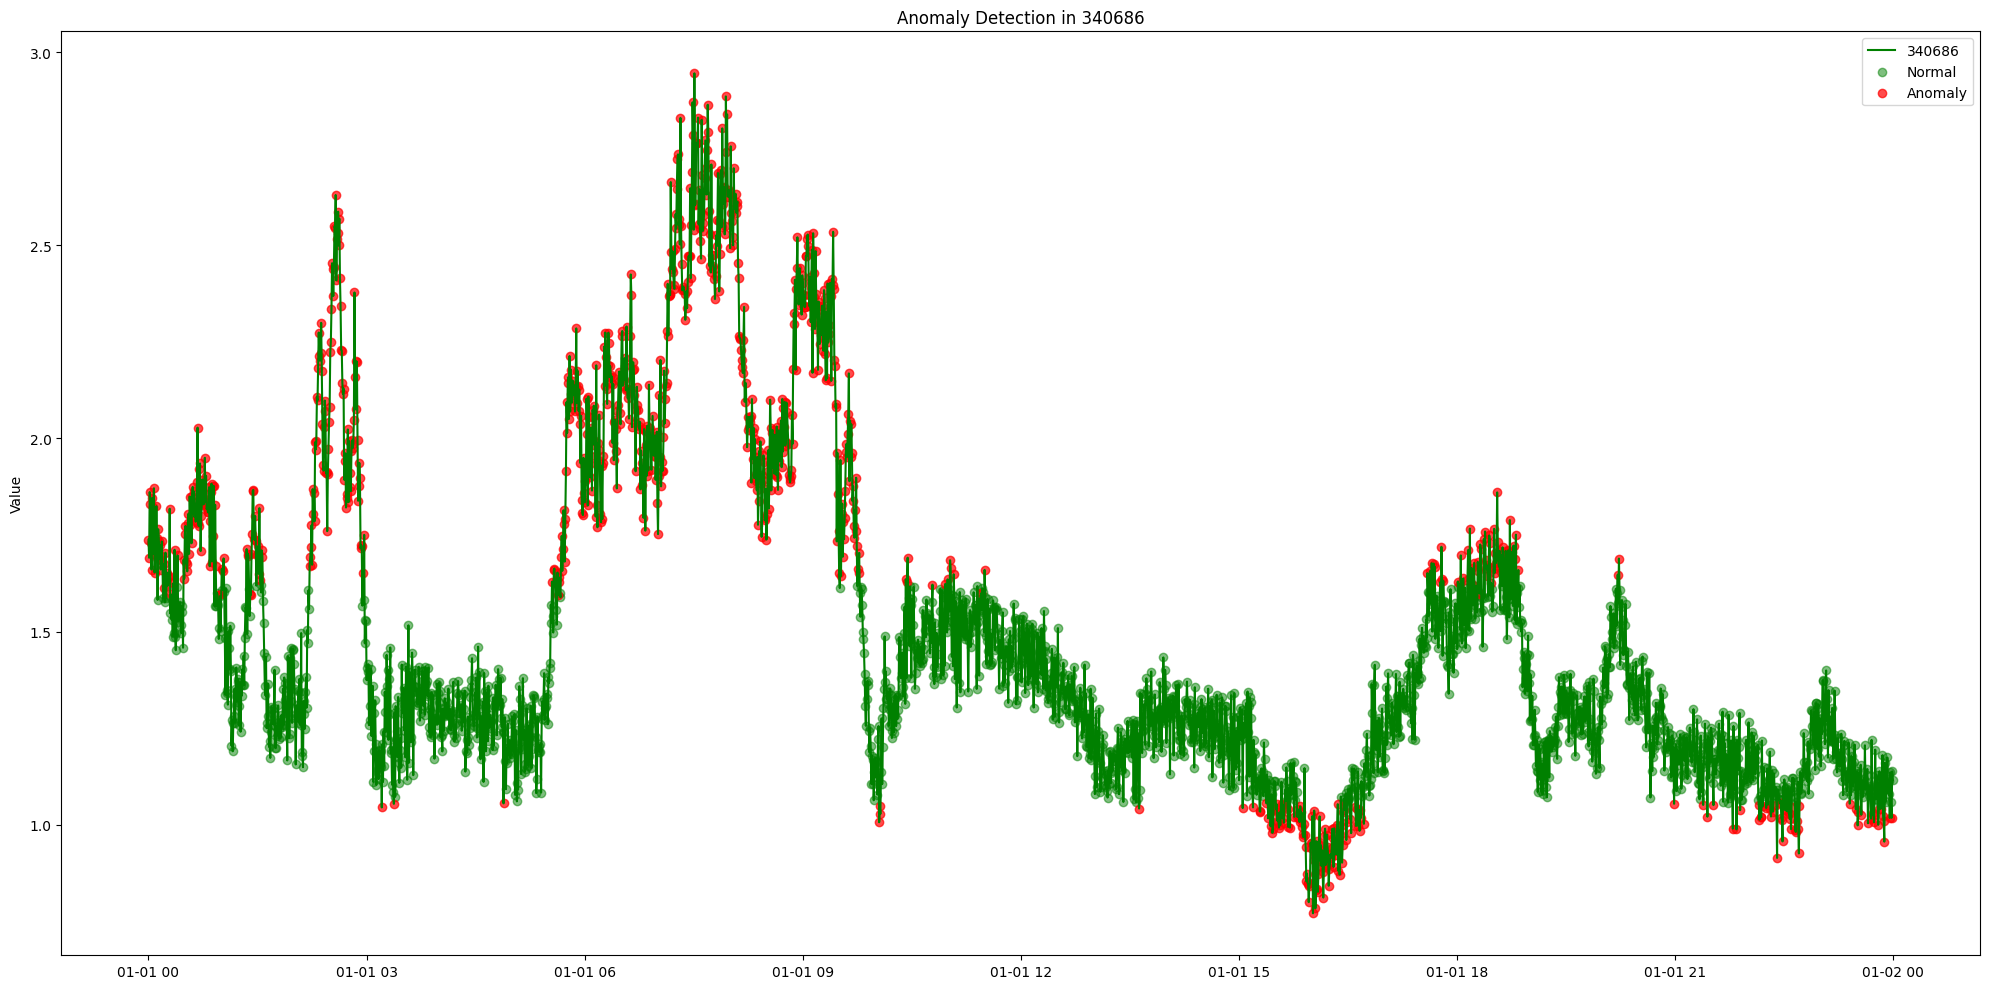

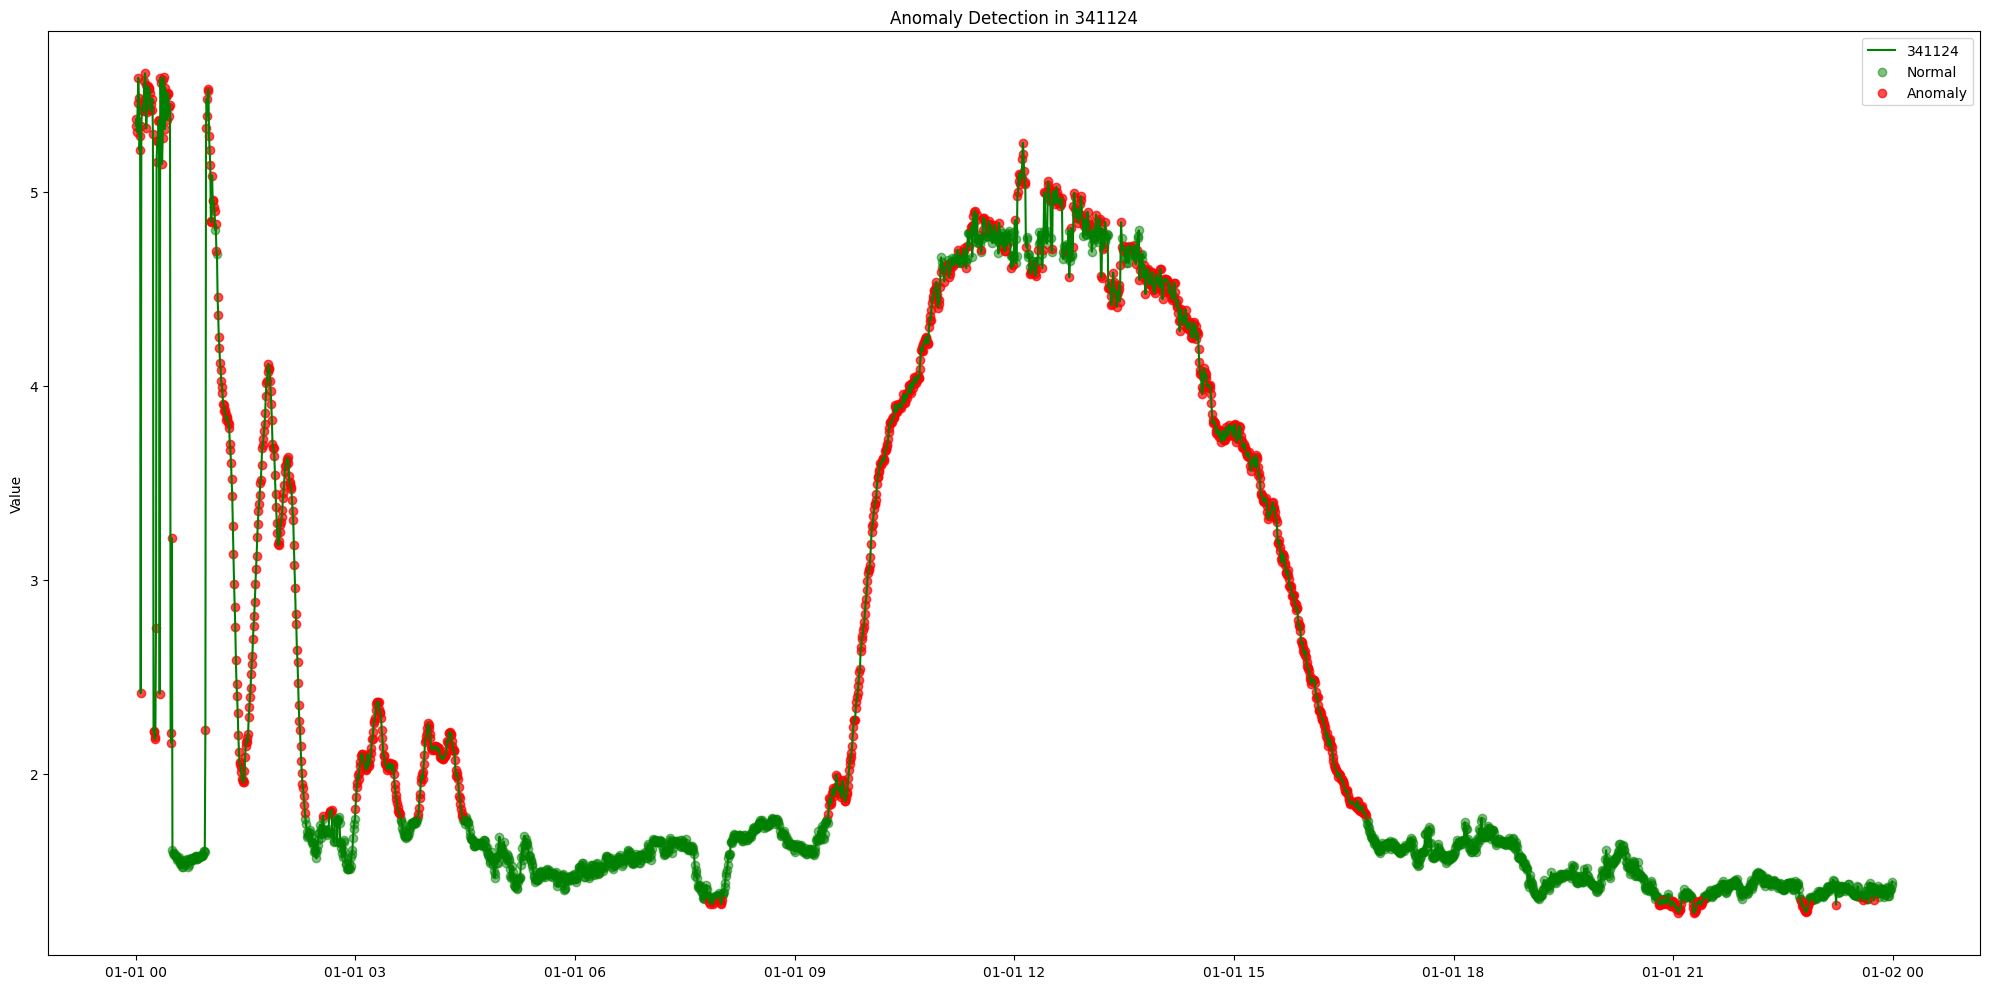

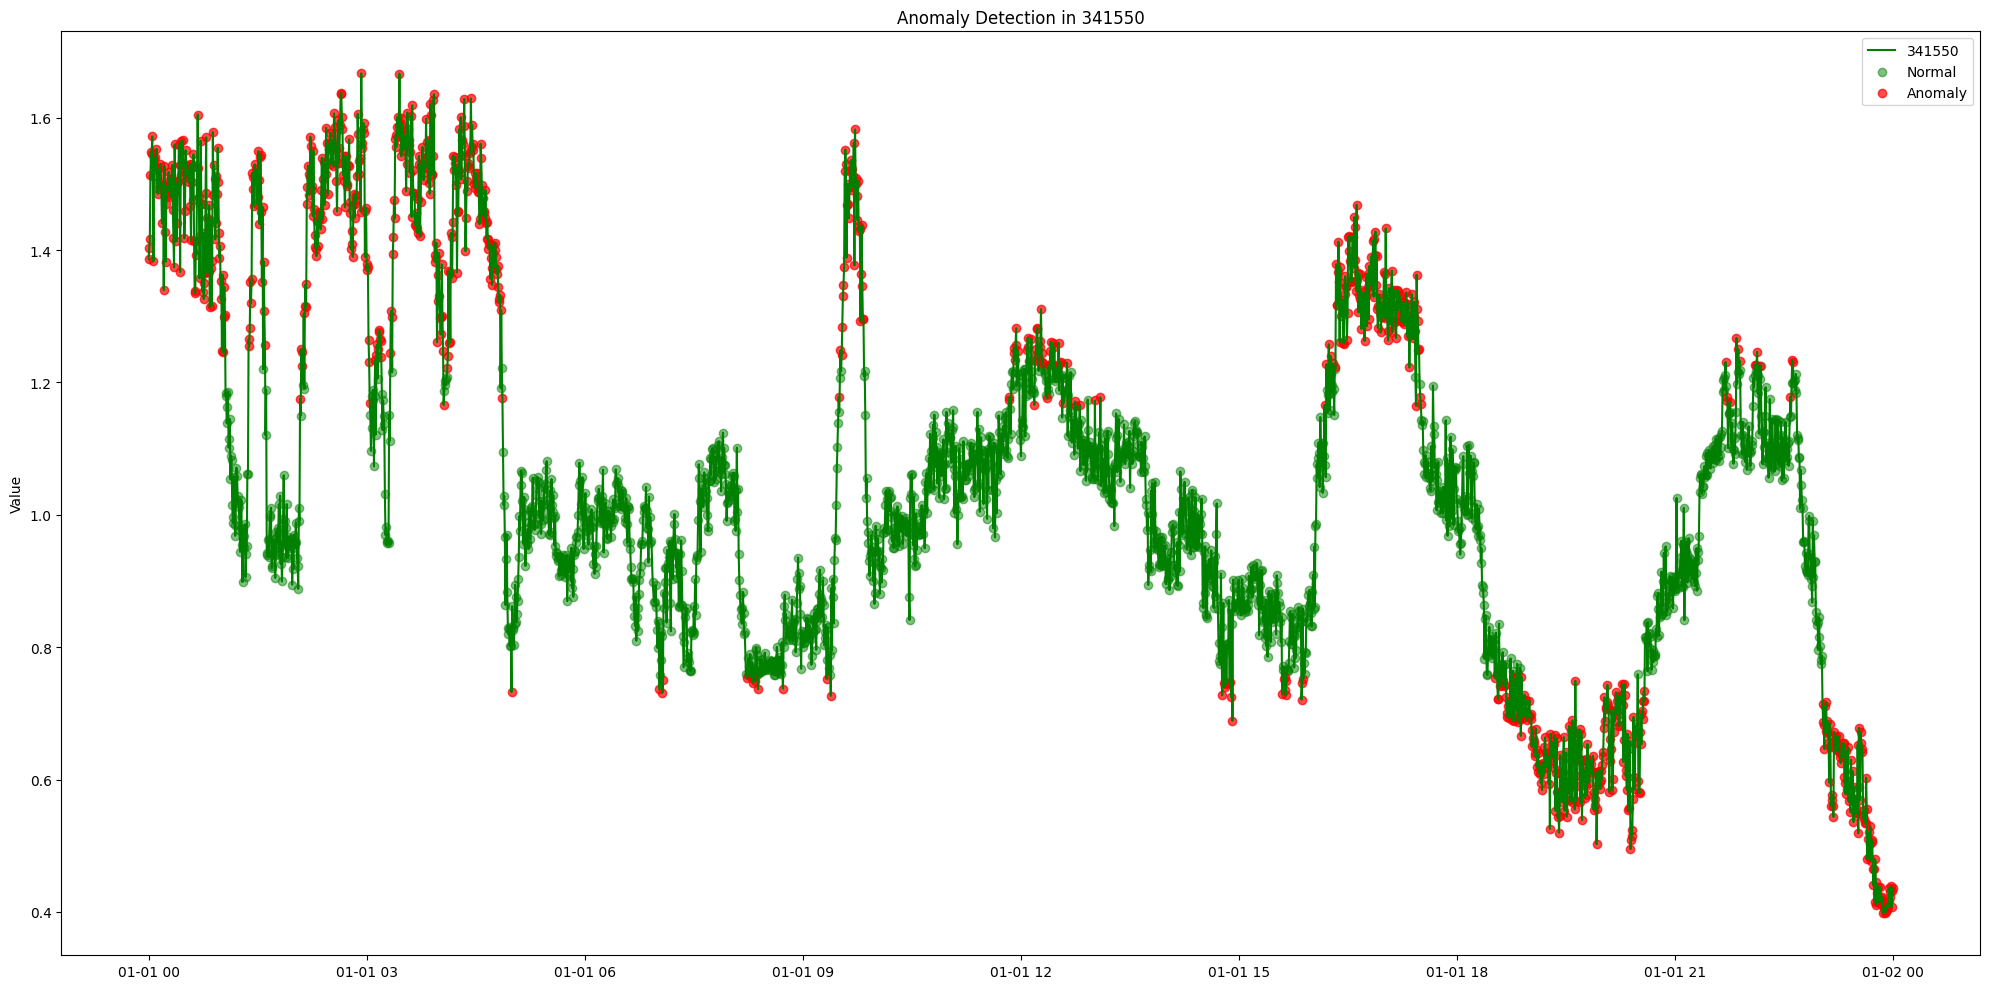

In [9]:
# Plot the detected anomalies
time_series_detector.plot_anomalies()